In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
from sklearn.preprocessing import scale, minmax_scale,robust_scale
from scipy import stats
import statsmodels.formula.api as smf


In [4]:
df = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/BOSTON_HOUSING.csv',engine='python',encoding='euc-kr')
df.head()
len(df)

# 중앙값이 3시그마 높은부분 - > age높고 dis낮고 rad높고 tax 높고 PTRATIO적당높음 B 높음
# 중앙값이 3시그마 낮은부분 - > age높고 dis낮고 rad높고 


506

테스트 셋 , 트레인 셋 나누기

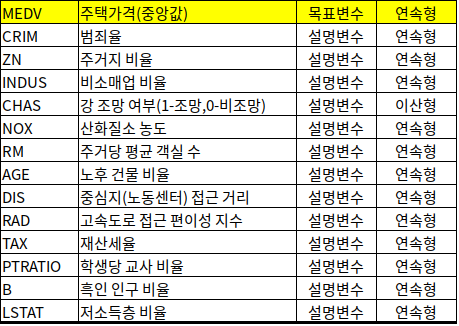

DIS nox , zn, indus , age ,chas
거리 , 산화질소 농도 , 주거지 비율 , 비소매업 비율, 노후 건물 비율 , 강이 보이나 않보이나
비싼집 옆에는 비싼집이있다. 그런데 건물이 노화되어도 비싼집 옆에는 비싼집이 있다.
싼집 옆에는 싼집이 있다.


주택가격 -> lstm(저소득층 비율) rm(주거당 평균 객실수)

In [185]:
df.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


정규화 하기

In [5]:
df_fittness_num = df.drop(['CHAS'], axis=1) 
df_chas = df['CHAS']

df_scale_std = scale(df_fittness_num)
df_scale_std = pd.DataFrame(df_scale_std , columns = df_fittness_num.columns)
df_scale_std.head()
df = df_scale_std
df['CHAS'] = df_chas
df.describe()

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,8.381526e-17,-7.438055e-17,3.306534e-16,-4.666338e-16,-1.217735e-15,6.320153e-16,-3.145266e-16,-3.335057e-17,1.514379e-15,-9.934960e-16,-7.029950e-16,4.049242e-16,1.015876e-16,0.069170
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,0.253994
min,-1.908226e+00,-4.197819e-01,-4.877224e-01,-1.557842e+00,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,0.000000
25%,-5.994557e-01,-4.109696e-01,-4.877224e-01,-8.676906e-01,-9.130288e-01,-5.686300e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880394e-01,2.050714e-01,-7.994200e-01,0.000000
50%,-1.450592e-01,-3.906665e-01,-4.877224e-01,-2.110986e-01,-1.442175e-01,-1.084653e-01,3.173816e-01,-2.793235e-01,-5.230014e-01,-4.646726e-01,2.748589e-01,3.811866e-01,-1.812535e-01,0.000000
75%,2.685231e-01,7.396564e-03,4.877224e-02,1.015999e+00,5.986791e-01,4.827678e-01,9.067981e-01,6.623710e-01,1.661245e+00,1.530926e+00,8.065760e-01,4.336511e-01,6.030187e-01,0.000000
max,2.989460e+00,9.933930e+00,3.804234e+00,2.422565e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,1.000000


In [197]:
hing = 'DIS'
tmp = ['CRIM','ZN','INDUS','NOX','RM','AGE','RAD','TAX','PTRATIO','B','LSTAT','CHAS']

for i in tmp:
    corr,pval = stats.pearsonr(df[hing],df[i])
    print(hing,'과',i,'의 상관계수와 p-value = :',corr.round(3), pval.round(3))

DIS 과 CRIM 의 상관계수와 p-value = : -0.38 0.0
DIS 과 ZN 의 상관계수와 p-value = : 0.664 0.0
DIS 과 INDUS 의 상관계수와 p-value = : -0.708 0.0
DIS 과 NOX 의 상관계수와 p-value = : -0.769 0.0
DIS 과 RM 의 상관계수와 p-value = : 0.205 0.0
DIS 과 AGE 의 상관계수와 p-value = : -0.748 0.0
DIS 과 RAD 의 상관계수와 p-value = : -0.495 0.0
DIS 과 TAX 의 상관계수와 p-value = : -0.534 0.0
DIS 과 PTRATIO 의 상관계수와 p-value = : -0.232 0.0
DIS 과 B 의 상관계수와 p-value = : 0.292 0.0
DIS 과 LSTAT 의 상관계수와 p-value = : -0.497 0.0
DIS 과 CHAS 의 상관계수와 p-value = : -0.099 0.026


군집화 하기

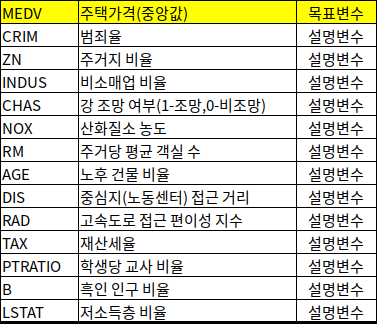

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
# CRIM RM
df2 = df[['CRIM','INDUS','NOX','DIS','RAD','CHAS']]
model = KMeans(n_clusters=12)#11
model.fit(df2)
y_predict = model.fit_predict(df2)
# print(y_predict) #[0 0 0 2 2 0 1 1 1]

df2['cluster'] = y_predict
# print(df2)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [87]:
df['Cluster'] = df2['cluster']

print ("Model1 Training Mean squared error: %.2f" % np.mean((reg_result.predict(df_test_x)- df_test_y) ** 2)


# print "Model1 Test Mean squared error: %.2f" % np.mean((reg_result.predict(df_test_x) - birth_test['gram']) ** 2)



SyntaxError: unexpected EOF while parsing (<ipython-input-87-ffdf686595ca>, line 7)

In [92]:
np.mean((reg_result.predict(df_test_x)- df_test_y)**2)
a = reg_result.predict(df_test_x) - df_test_y
aa=[]
for i in a :
    if i<0:
        aa.append(i*-1)
    else : aa.append(i)
np.mean(aa)

0.4060142997751473

In [78]:
df_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,Cluster,MEDV
99,-0.412534,-0.487722,-1.203282,-0.947582,1.611810,-0.216027,-0.142536,-0.867883,-0.785394,-0.210622,0.441052,-0.905952,0,0,1.160991
102,-0.393896,-0.487722,-0.375976,-0.299708,0.171480,0.598310,-0.513562,-0.523001,-0.143951,1.130229,-3.134425,-0.283580,0,5,-0.428037
416,0.840293,-0.487722,1.015999,1.073787,0.708576,0.790337,-0.939112,1.661245,1.530926,0.806576,-3.674201,1.841454,0,1,-1.636133
266,-0.329083,0.370669,-1.045700,0.797361,1.039097,0.569862,-0.790131,-0.523001,-0.856665,-2.522434,0.300379,0.299543,0,5,0.888897
101,-0.407214,-0.487722,-0.375976,-0.299708,0.707152,0.096906,-0.446344,-0.523001,-0.143951,1.130229,0.426579,-0.698495,0,5,0.431779


In [77]:
df_train = df_train_x
df_train['MEDV'] = df_train_y

reg_model = smf.ols(formula = "MEDV ~ C(Cluster)+CRIM+ZN+INDUS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT+CHAS ", data = df_train)
# CRIM	ZN	INDUS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	CHAS
#적합 'CRIM','ZN','INDUS','CHAS','NOX','DIS','RAD','B'
reg_result = reg_model.fit()
print(reg_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     42.99
Date:                Sat, 08 Feb 2020   Prob (F-statistic):           1.62e-86
Time:                        14:51:49   Log-Likelihood:                -243.88
No. Observations:                 354   AIC:                             537.8
Df Residuals:                     329   BIC:                             634.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4624      0.193  

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
df_x = df.drop(['MEDV'], axis=1, inplace = False) 
df_y=df['MEDV']
df_x.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,Cluster
0,-0.419782,0.284830,-1.287910,-0.144218,0.413672,-0.120014,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0,0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303095,0.441052,-0.492439,0,10
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303095,0.396427,-1.208727,0,10
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,0,2
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228576,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,0,2


In [59]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3 ,random_state = 1234)

In [368]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [369]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

#train 설명력 확인
print(tree_uncustomized.score(df_train_x, df_train_y))
#train 설명력 확인
print(tree_uncustomized.score(df_test_x, df_test_y))

1.0
0.8488868381931653


In [372]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.849
1,2,0.987,0.858
2,3,0.972,0.857
3,4,0.951,0.845
4,5,0.929,0.857
5,6,0.898,0.853
6,7,0.885,0.843
7,8,0.874,0.839
8,9,0.862,0.831
9,10,0.849,0.831


In [373]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 5, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.929,0.857
1,6,0.929,0.857
2,8,0.929,0.857
3,10,0.929,0.857
4,12,0.927,0.858
5,14,0.923,0.858
6,16,0.914,0.848
7,18,0.909,0.853
8,20,0.897,0.865
9,22,0.892,0.861


In [375]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,15)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 5, min_samples_split=20,max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["Depth"] = para_depth
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,Depth,TrainScore,TestScore
0,1,0.442,0.443
1,2,0.692,0.711
2,3,0.776,0.778
3,4,0.852,0.847
4,5,0.875,0.856
5,6,0.886,0.858
6,7,0.891,0.861
7,8,0.893,0.863
8,9,0.894,0.864
9,10,0.895,0.865


In [385]:
tree_final=DecisionTreeRegressor(random_state=1234, min_samples_leaf = 5, min_samples_split=20,max_depth=9)
tree_final.fit(df_train_x,df_train_y)

print('Train set score : ' ,tree_final.score(df_train_x, df_train_y))
print('Test  set score : ', tree_final.score(df_test_x, df_test_y))



Train set score :  0.893624304208859
Test  set score :  0.8636146296359929


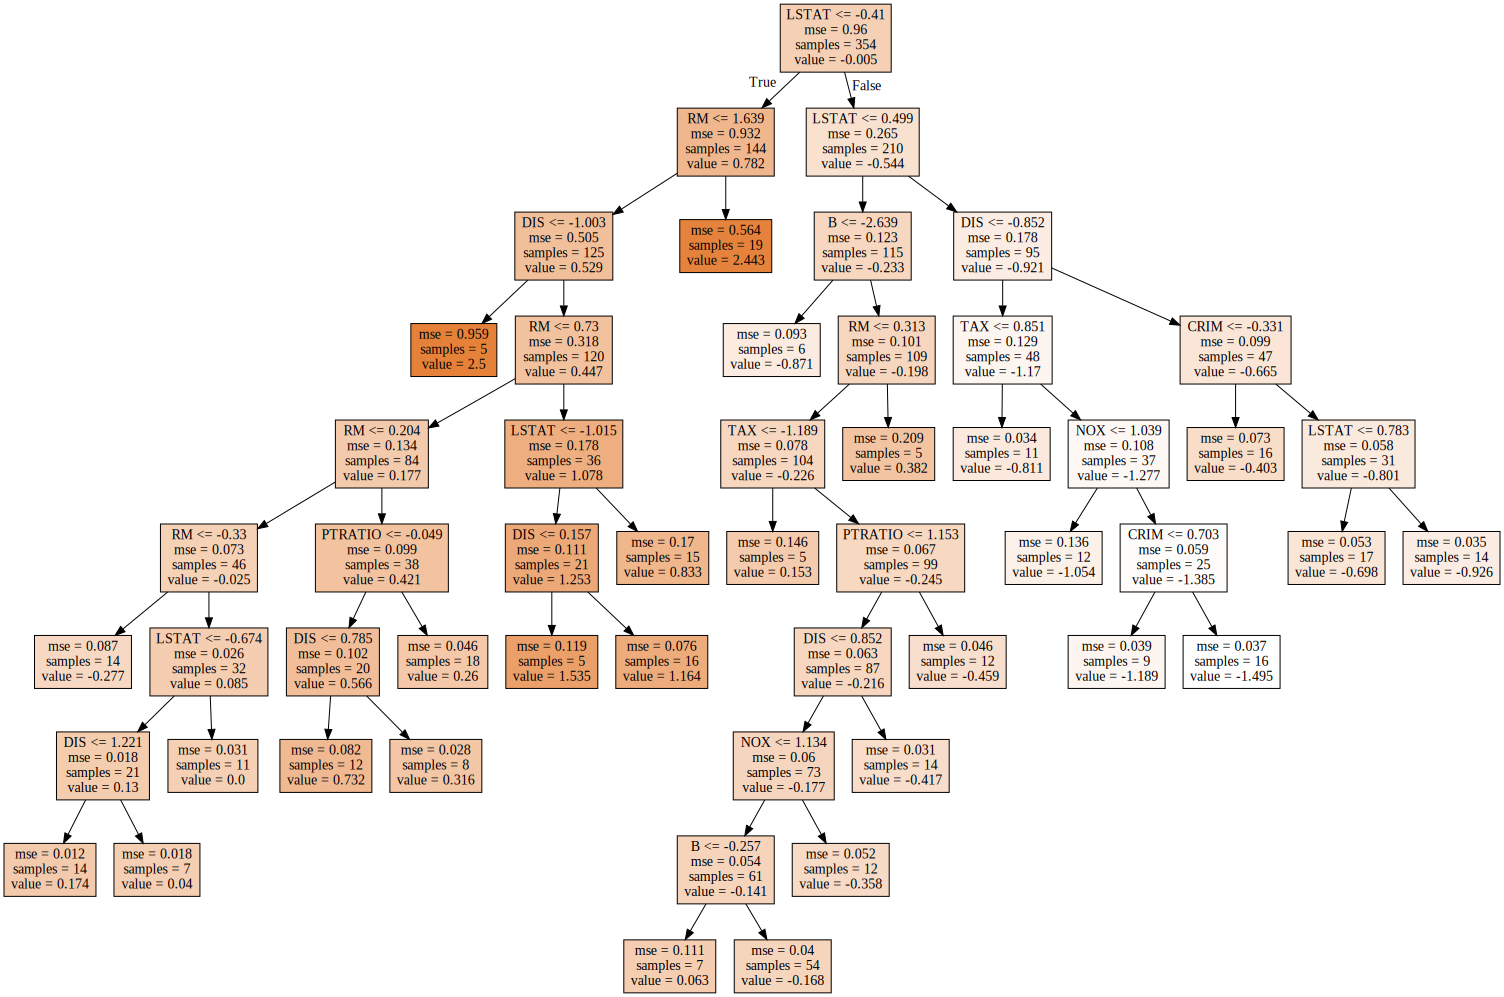

In [389]:
v_feature_name = df_train_x.columns
export_graphviz(tree_final, out_file='tree_final.png', feature_names = v_feature_name,impurity=True,filled=True)

with open("tree_final.png") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [377]:
result = tree_final.predict(df_test_x)

MSE = mean_squared_error(result,df_test_y)
MSA = mean_absolute_error(result, df_test_y)
print("MSE: ",MSE,"MSA: ", MSA)

MSE:  0.14892281477705263 MSA:  0.2806588016202815


In [390]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 설명력
print(rf_uncustomized.score(df_train_x,df_train_y))
print(rf_uncustomized.score(df_test_x,df_test_y))




0.9729305119894257
0.8691273856957157


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [392]:
train_score=[]; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,20)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_n=pd.DataFrame()
df_score_n['n_estimator']= para_n_tree
df_score_n['TrainScore']= train_score
df_score_n['TestScore']= test_score
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.973,0.869
1,20,0.980,0.895
2,30,0.980,0.894
3,40,0.978,0.894
4,50,0.978,0.892
5,60,0.980,0.894
6,70,0.981,0.895
7,80,0.981,0.895
8,90,0.981,0.894
9,100,0.981,0.896


In [393]:
train_score=[]; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(n_estimators=70,min_samples_leaf=v_min_samples_leaf, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_leaf=pd.DataFrame()
df_score_leaf['n_estimator']= para_leaf
df_score_leaf['TrainScore']= train_score
df_score_leaf['TestScore']= test_score
df_score_leaf.round(3)

,n_estimator,TrainScore,TestScore
0,1,0.981,0.895
1,2,0.967,0.894
2,3,0.947,0.893
3,4,0.927,0.885
4,5,0.908,0.879
5,6,0.894,0.874
6,7,0.882,0.868
7,8,0.871,0.864
8,9,0.864,0.861
9,10,0.856,0.857


In [395]:
train_score=[]; test_score = []
para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(n_estimators=70,min_samples_leaf=1,min_samples_split=v_min_samples_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_split=pd.DataFrame()
df_score_split['n_estimator']= para_split
df_score_split['TrainScore']= train_score
df_score_split['TestScore']= test_score
df_score_split.round(3)

,n_estimator,TrainScore,TestScore
0,4,0.976,0.894
1,6,0.971,0.894
2,8,0.966,0.892
3,10,0.960,0.891
4,12,0.952,0.891
5,14,0.944,0.886
6,16,0.936,0.886
7,18,0.931,0.883
8,20,0.926,0.882
9,22,0.922,0.880


In [397]:
train_score=[]; test_score = []
para_depth = [n_depth for n_depth in range(1,15)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(n_estimators=70,min_samples_leaf=1,min_samples_split=4, max_depth=v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_depth=pd.DataFrame()
df_score_depth['depth']= para_depth
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= test_score
df_score_depth.round(3)



,depth,TrainScore,TestScore
0,1,0.580,0.602
1,2,0.768,0.782
2,3,0.879,0.846
3,4,0.917,0.869
4,5,0.939,0.881
5,6,0.953,0.890
6,7,0.962,0.891
7,8,0.968,0.895
8,9,0.971,0.895
9,10,0.973,0.894


In [102]:
rf_final = RandomForestRegressor(n_estimators=70,min_samples_leaf=1,min_samples_split=4, max_depth=8, random_state = 1234)
rf_final.fit(df_train_x,df_train_y)

print('Train set score : ' ,rf_final.score(df_train_x, df_train_y))
print('Test  set score : ', rf_final.score(df_test_x, df_test_y))

Train set score :  0.9683486758920286
Test  set score :  0.8920974519572468


In [104]:
result = rf_final.predict(df_test_x)

MSE = mean_squared_error(result,df_test_y)
MSA = mean_absolute_error(result, df_test_y)
print("MSE: ",MSE,"MSA: ", MSA)



MSE:  0.11782166322718511 MSA:  0.2363444732685249


In [401]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 설명력
print(rf_uncustomized.score(df_train_x,df_train_y))
print(rf_uncustomized.score(df_test_x,df_test_y))


0.9729305119894257
0.8691273856957157


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [416]:
# d = .drop(['Cluster'], axis=1, inplace = False) 
# d1 =  .drop(['Cluster'], axis=1, inplace = False) 


rf_uncustomized = GradientBoostingRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 설명력
print(rf_uncustomized.score(df_train_x,df_train_y))
print(rf_uncustomized.score(df_test_x,df_test_y))

0.9812573755843452
0.8985741426405488


In [419]:
train_score=[]; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,31)]

for v_n_estimators in para_n_tree:
    rf=GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_n=pd.DataFrame()
df_score_n['n_estimator']= para_n_tree
df_score_n['TrainScore']= train_score
df_score_n['TestScore']= test_score
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.770,0.751
1,20,0.907,0.863
2,30,0.942,0.885
3,40,0.957,0.892
4,50,0.965,0.895
5,60,0.970,0.896
6,70,0.974,0.897
7,80,0.977,0.898
8,90,0.979,0.899
9,100,0.981,0.899


In [420]:
train_score=[]; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=GradientBoostingRegressor(n_estimators=90,min_samples_leaf=v_min_samples_leaf, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_leaf=pd.DataFrame()
df_score_leaf['para_leaf']= para_leaf
df_score_leaf['TrainScore']= train_score
df_score_leaf['TestScore']= test_score
df_score_leaf.round(3)

,para_leaf,TrainScore,TestScore
0,1,0.979,0.899
1,2,0.977,0.895
2,3,0.977,0.903
3,4,0.975,0.905
4,5,0.973,0.896
5,6,0.970,0.900
6,7,0.966,0.892
7,8,0.964,0.888
8,9,0.963,0.902
9,10,0.962,0.909


In [421]:
train_score=[]; test_score = []
para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=GradientBoostingRegressor(n_estimators=90,min_samples_leaf=13,min_samples_split=v_min_samples_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_split=pd.DataFrame()
df_score_split['n_estimator']= para_split
df_score_split['TrainScore']= train_score
df_score_split['TestScore']= test_score
df_score_split.round(3)

,n_estimator,TrainScore,TestScore
0,4,0.952,0.910
1,6,0.952,0.910
2,8,0.952,0.910
3,10,0.952,0.910
4,12,0.952,0.910
5,14,0.952,0.910
6,16,0.952,0.910
7,18,0.952,0.910
8,20,0.952,0.910
9,22,0.952,0.910


In [422]:
train_score=[]; test_score = []
para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf=GradientBoostingRegressor(n_estimators=90,min_samples_leaf=13,min_samples_split=26, max_depth=v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_depth=pd.DataFrame()
df_score_depth['depth']= para_depth
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= test_score
df_score_depth.round(3)



,depth,TrainScore,TestScore
0,1,0.853,0.839
1,2,0.924,0.896
2,3,0.952,0.910
3,4,0.968,0.913
4,5,0.978,0.909
5,6,0.982,0.916
6,7,0.985,0.914
7,8,0.985,0.913
8,9,0.986,0.913
9,10,0.986,0.912


In [427]:
train_score=[]; test_score = []
para_lr = [lr*0.01 for lr in range(1,30)]

for v_learning_rate in para_lr:
    rf=GradientBoostingRegressor(n_estimators=90,min_samples_leaf=13,min_samples_split=26, max_depth=6,learning_rate=v_learning_rate, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_depth=pd.DataFrame()
df_score_depth['learning_rate']= para_lr
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= test_score
df_score_depth.round(3)



,learning_rate,TrainScore,TestScore
0,0.01,0.724,0.722
1,0.02,0.882,0.859
2,0.03,0.926,0.884
3,0.04,0.947,0.892
4,0.05,0.956,0.899
5,0.06,0.965,0.905
6,0.07,0.970,0.905
7,0.08,0.974,0.905
8,0.09,0.979,0.913
9,0.10,0.982,0.916


In [101]:
df_train_x = df_train_x.drop(["MEDV"],axis=1, inplace = False)
rf_final = GradientBoostingRegressor(n_estimators=90,min_samples_leaf=13,min_samples_split=26, max_depth=6, learning_rate=0.12,random_state = 1234)
rf_final.fit(df_train_x,df_train_y)


print('Train set score : ' ,rf_final.score(df_train_x, df_train_y))
print('Test  set score : ', rf_final.score(df_test_x, df_test_y))


KeyError: "['MEDV'] not found in axis"

In [99]:
result = rf_final.predict(df_test_x)

MSE = mean_squared_error(result,df_test_y)
MSA = mean_absolute_error(result, df_test_y)
print("MSE: ",MSE,"MSA: ", MSA)



MSE:  0.09392123422812106 MSA:  0.2094653281297157


Text(0, 0.5, '변수')

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runtim

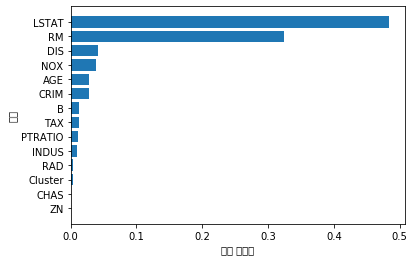

In [100]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)


df_importance.sort_values("Importance", ascending =True , inplace= True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")


In [233]:
df.head()

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,Cluster
0,0.159686,-0.419782,0.284830,-1.287910,-0.144218,0.413672,-0.120014,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0,0
1,-0.101524,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303095,0.441052,-0.492439,0,2
2,1.324247,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303095,0.396427,-1.208727,0,0
3,1.182758,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,0,0
4,1.487503,-0.412482,-0.487722,-1.306878,-0.835284,1.228576,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,0,0


In [202]:
df.describe()

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,Cluster
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,506.000000
mean,8.381526e-17,-7.438055e-17,3.306534e-16,-4.666338e-16,-1.217735e-15,6.320153e-16,-3.145266e-16,-3.335057e-17,1.514379e-15,-9.934960e-16,-7.029950e-16,4.049242e-16,1.015876e-16,0.069170,6.786561
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,0.253994,4.205830
min,-1.908226e+00,-4.197819e-01,-4.877224e-01,-1.557842e+00,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,0.000000,0.000000
25%,-5.994557e-01,-4.109696e-01,-4.877224e-01,-8.676906e-01,-9.130288e-01,-5.686300e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880394e-01,2.050714e-01,-7.994200e-01,0.000000,4.000000
50%,-1.450592e-01,-3.906665e-01,-4.877224e-01,-2.110986e-01,-1.442175e-01,-1.084653e-01,3.173816e-01,-2.793235e-01,-5.230014e-01,-4.646726e-01,2.748589e-01,3.811866e-01,-1.812535e-01,0.000000,7.000000
75%,2.685231e-01,7.396564e-03,4.877224e-02,1.015999e+00,5.986791e-01,4.827678e-01,9.067981e-01,6.623710e-01,1.661245e+00,1.530926e+00,8.065760e-01,4.336511e-01,6.030187e-01,0.000000,11.000000
max,2.989460e+00,9.933930e+00,3.804234e+00,2.422565e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,1.000000,15.000000


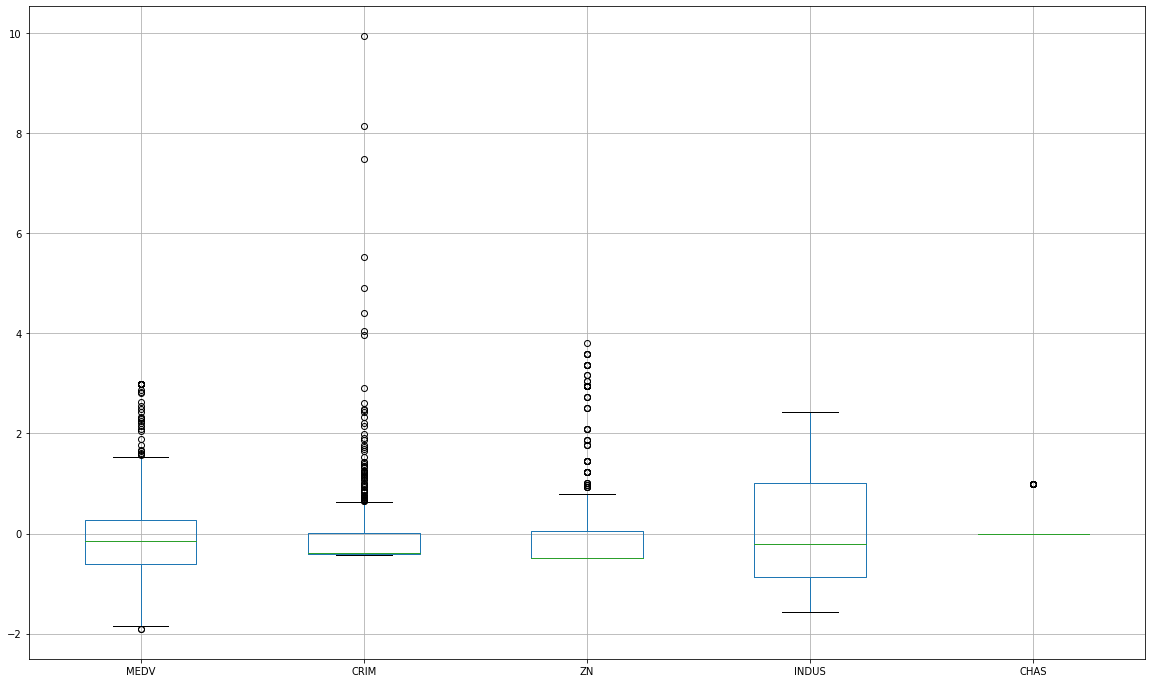

In [203]:
df[['MEDV','CRIM','ZN','INDUS','CHAS']].boxplot(figsize = (20,12))

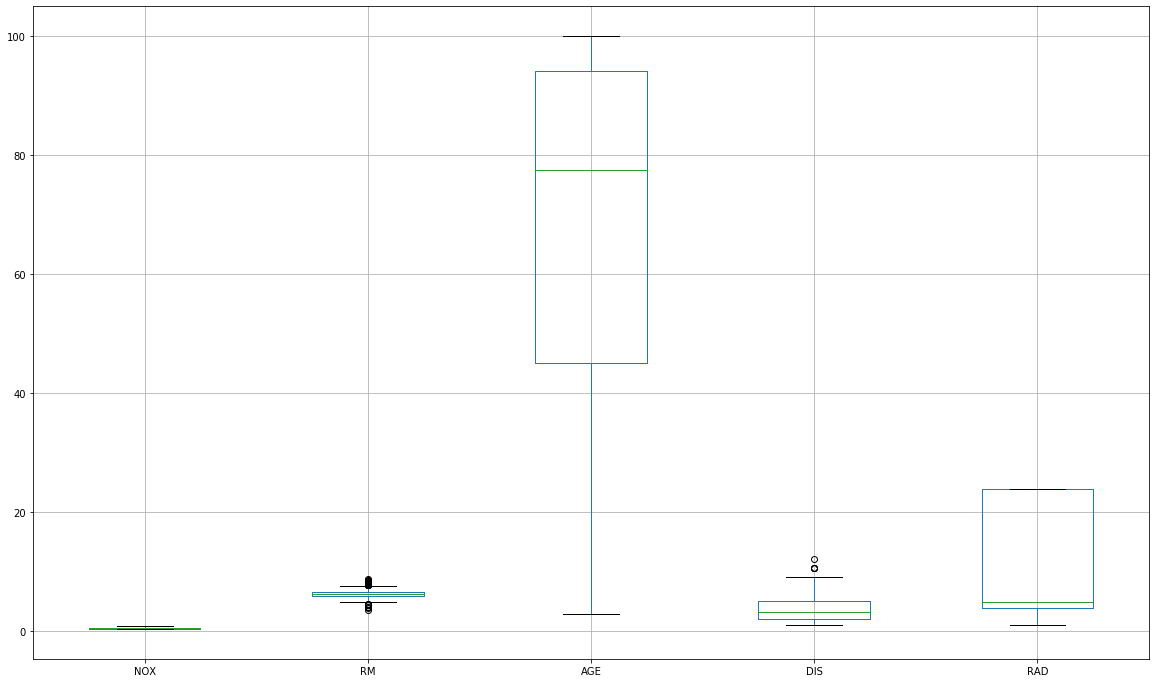

In [9]:
# 	TAX	PTRATIO	B	LSTAT.

df[['NOX','RM','AGE','DIS','RAD']].boxplot(figsize = (20,12))

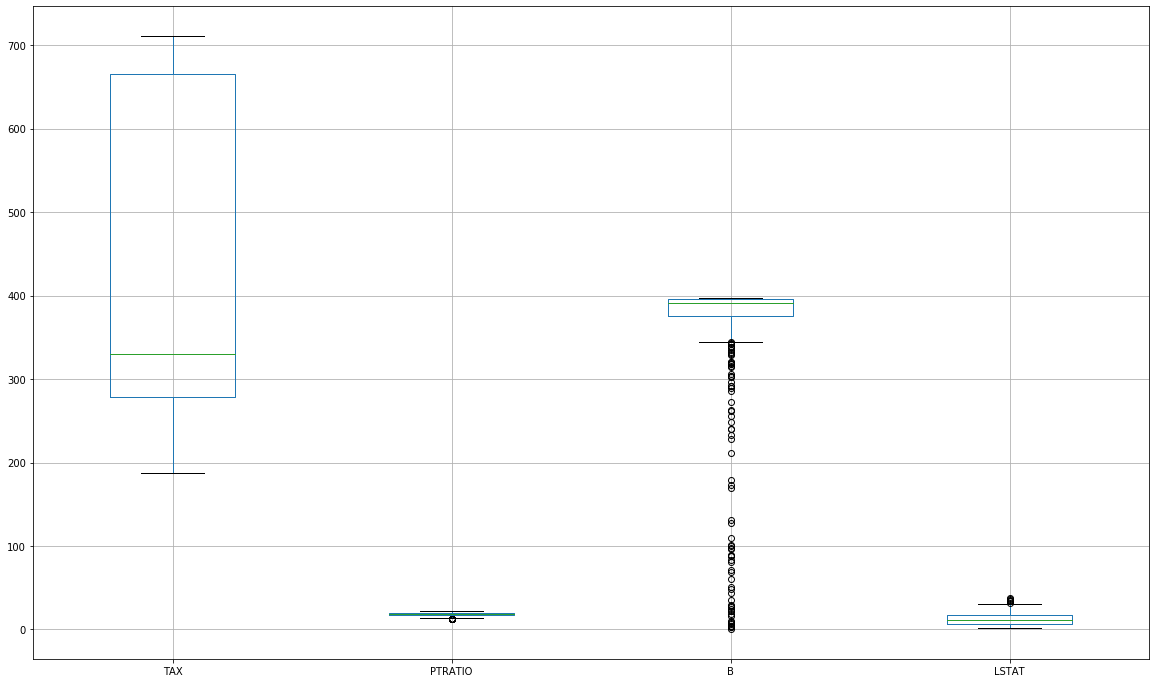

In [10]:
df[['TAX','PTRATIO','B','LSTAT']].boxplot(figsize = (20,12))

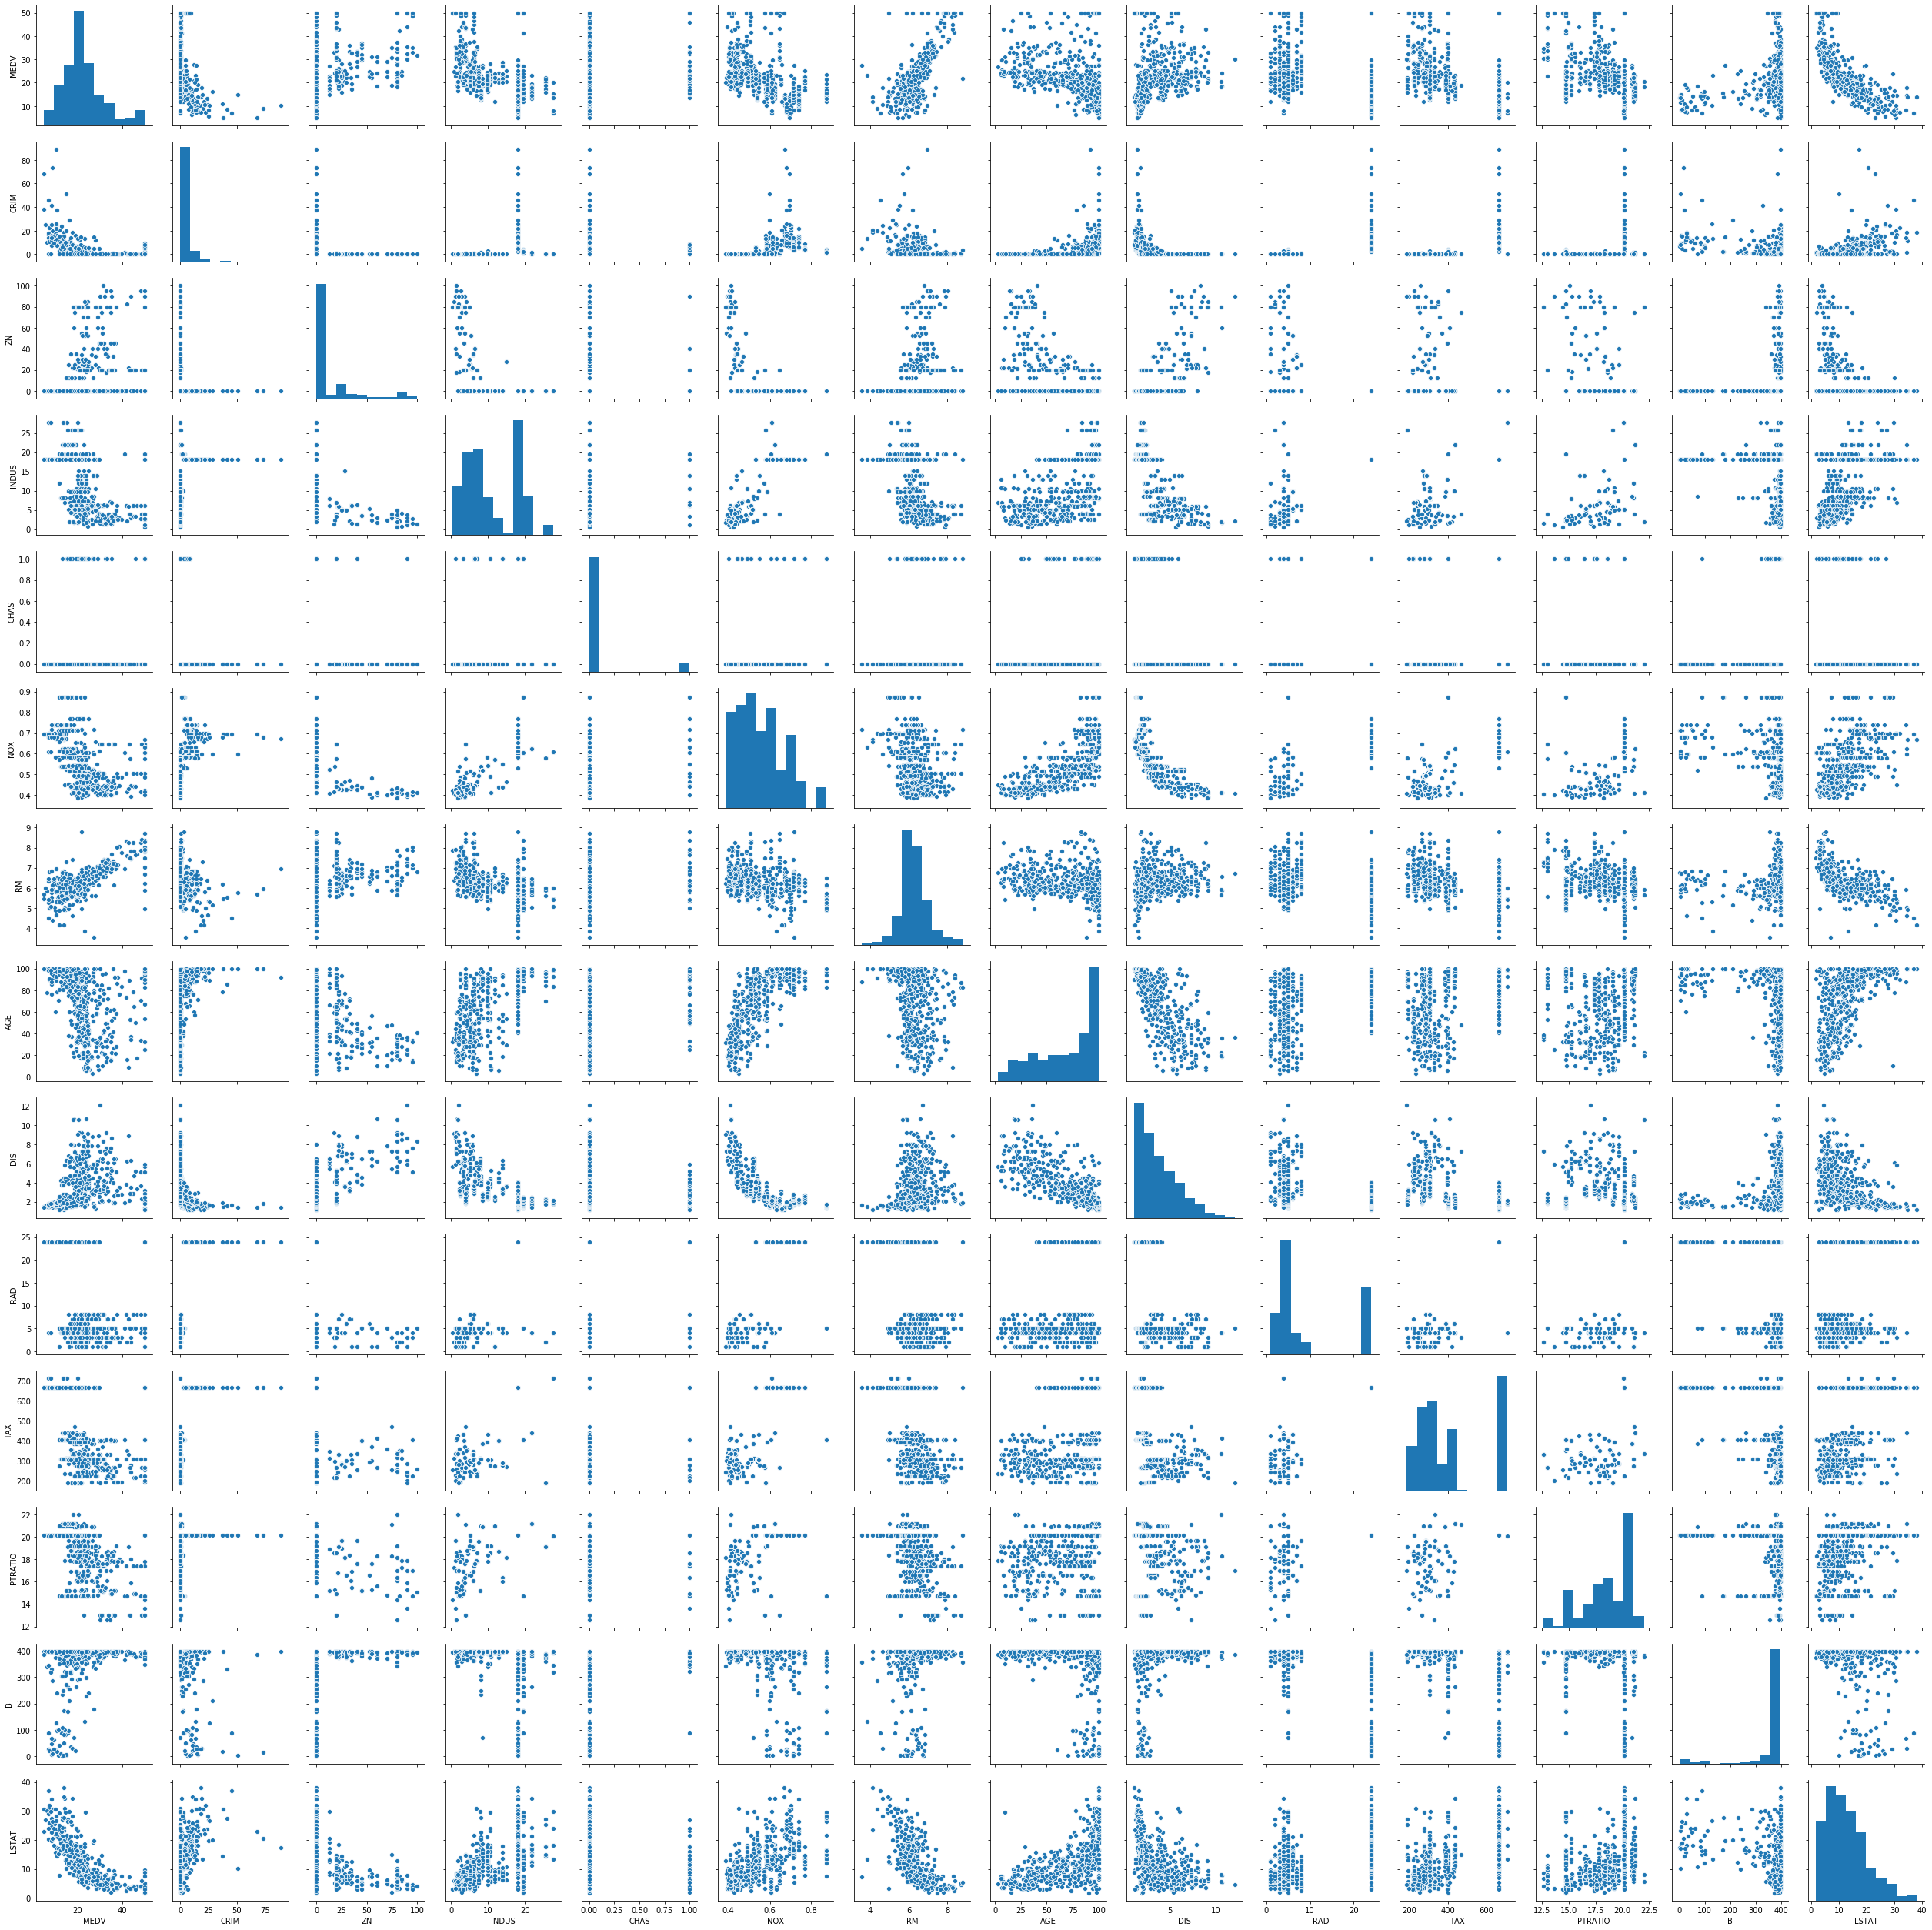

In [16]:
sns.pairplot(df)

In [18]:
df.iloc[:,0]

0      24.000000
1      21.600000
2      34.700001
3      33.400002
4      36.200001
         ...    
501    22.400000
502    20.600000
503    23.900000
504    22.000000
505    11.900000
Name: MEDV, Length: 506, dtype: float64

In [19]:
df.corr().round(3)



,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.388,0.360,-0.484,0.175,-0.427,0.695,-0.377,0.250,-0.382,-0.469,-0.508,0.333,-0.738
CRIM,-0.388,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456
ZN,0.360,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413
INDUS,-0.484,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604
CHAS,0.175,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054
NOX,-0.427,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591
RM,0.695,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614
AGE,-0.377,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602
DIS,0.250,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497
RAD,-0.382,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489


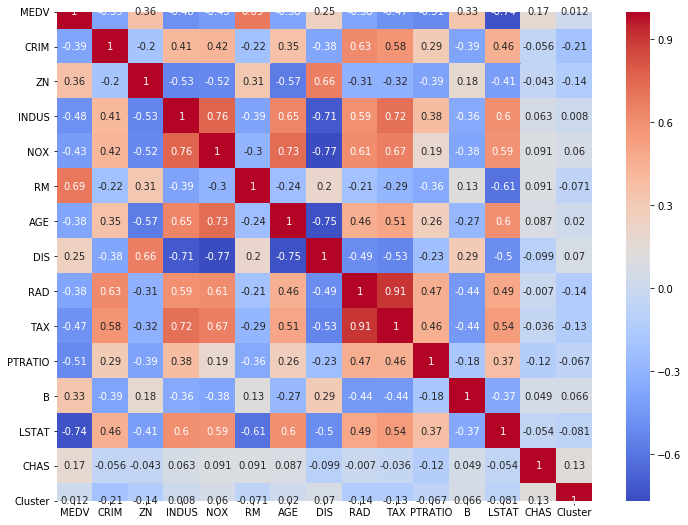

In [204]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr().round(3), annot=True, cmap='coolwarm')

In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib in line


UsageError: unrecognized arguments: line



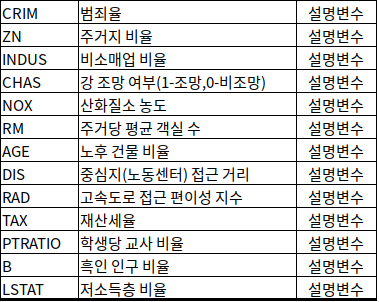

In [221]:

#설명 변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df.drop(["MEDV"], axis=1) 

df_raw_x
#statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
#DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values , i) for i in range(df_raw_x_const.shape[1])]
#vif 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)


/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
13,CHAS,1.087
14,Cluster,1.244
11,B,1.349
10,PTRATIO,1.801
1,CRIM,1.820
5,RM,1.959
2,ZN,2.401
12,LSTAT,3.006
6,AGE,3.117
3,INDUS,4.003


In [211]:

#설명 변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df.drop(['MEDV',"TAX"], axis=1) 

df_raw_x
#statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
#DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values , i) for i in range(df_raw_x_const.shape[1])]
#vif 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)


,variable,VIF
12,CHAS,1.073
13,Cluster,1.240
10,B,1.348
9,PTRATIO,1.792
1,CRIM,1.819
5,RM,1.947
2,ZN,2.299
8,RAD,2.855
11,LSTAT,3.004
6,AGE,3.113


In [ ]:
df_raw_x = df_raw.drop(['FAT',"WEIGHT"],axis = 1)

df_raw_x_const=add_constant(df_raw_x)
df_vif=pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

In [223]:
df_raw_y= df["MEDV"]

model = LinearRegression()
rfe = RFE(estimator = model , n_features_to_select=13).fit(df_raw_x,df_raw_y)
selected_cols = df_raw_x.columns[rfe.support_]
removed_cols = df_raw_x.columns[~rfe.support_]

print("selected Variables: {}" .format(selected_cols))
print("selected Variables: {}" .format(removed_cols))

selected Variables: Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'CHAS', 'Cluster'],
      dtype='object')
selected Variables: Index(['AGE'], dtype='object')


In [110]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [172]:
# RM+AGE+TAX+PTRATIO+LSTAT+CHAS
df_raw_x = df[['RM','AGE','TAX','PTRATIO','LSTAT','CHAS','Cluster']]
df_raw_y = df['MEDV']

df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3 , random_state = 1234)


In [173]:
rf_uncustomized = GradientBoostingRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 설명력
print(rf_uncustomized.score(df_train_x,df_train_y))
print(rf_uncustomized.score(df_test_x,df_test_y))

0.9619457570942813
0.8818262240256435


In [168]:
train_score=[]; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,20)]

for v_n_estimators in para_n_tree:
    rf=GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_n=pd.DataFrame()
df_score_n['n_estimator']= para_n_tree
df_score_n['TrainScore']= train_score
df_score_n['TestScore']= test_score
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.735,0.736
1,20,0.869,0.846
2,30,0.910,0.871
3,40,0.925,0.876
4,50,0.933,0.877
5,60,0.937,0.879
6,70,0.944,0.878
7,80,0.949,0.879
8,90,0.954,0.877
9,100,0.956,0.877


In [155]:
train_score=[]; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,40)]

for v_min_samples_leaf in para_leaf:
    rf=GradientBoostingRegressor(n_estimators=190,min_samples_leaf=v_min_samples_leaf, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_leaf=pd.DataFrame()
df_score_leaf['para_leaf']= para_leaf
df_score_leaf['TrainScore']= train_score
df_score_leaf['TestScore']= test_score
df_score_leaf.round(3)

,para_leaf,TrainScore,TestScore
0,1,0.992,0.904
1,2,0.992,0.903
2,3,0.991,0.908
3,4,0.989,0.908
4,5,0.988,0.907
5,6,0.987,0.904
6,7,0.985,0.900
7,8,0.985,0.906
8,9,0.984,0.912
9,10,0.982,0.910


In [156]:
train_score=[]; test_score = []
para_split = [n_split*2 for n_split in range(2,40)]

for v_min_samples_split in para_split:
    rf=GradientBoostingRegressor(n_estimators=190,min_samples_leaf=12,min_samples_split=v_min_samples_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_split=pd.DataFrame()
df_score_split['n_estimator']= para_split
df_score_split['TrainScore']= train_score
df_score_split['TestScore']= test_score
df_score_split.round(3)

,n_estimator,TrainScore,TestScore
0,4,0.980,0.916
1,6,0.980,0.916
2,8,0.980,0.916
3,10,0.980,0.916
4,12,0.980,0.916
5,14,0.980,0.916
6,16,0.980,0.916
7,18,0.980,0.916
8,20,0.980,0.916
9,22,0.980,0.916


In [157]:
train_score=[]; test_score = []
para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf=GradientBoostingRegressor(n_estimators=190,min_samples_leaf=11,min_samples_split=26, max_depth=v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_depth=pd.DataFrame()
df_score_depth['depth']= para_depth
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= test_score
df_score_depth.round(3)



,depth,TrainScore,TestScore
0,1,0.886,0.861
1,2,0.955,0.900
2,3,0.981,0.918
3,4,0.990,0.910
4,5,0.993,0.912
5,6,0.996,0.909
6,7,0.997,0.909
7,8,0.998,0.910
8,9,0.998,0.906
9,10,0.998,0.908


In [158]:
train_score=[]; test_score = []
para_lr = [lr*0.05 for lr in range(1,10)]

for v_learning_rate in para_lr:
    rf=GradientBoostingRegressor(n_estimators=190,min_samples_leaf=11,min_samples_split=26, max_depth=5,learning_rate=v_learning_rate, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_depth=pd.DataFrame()
df_score_depth['learning_rate']= para_lr
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= test_score
df_score_depth.round(3)



,learning_rate,TrainScore,TestScore
0,0.05,0.983,0.909
1,0.10,0.993,0.912
2,0.15,0.997,0.912
3,0.20,0.999,0.915
4,0.25,0.999,0.912
5,0.30,1.000,0.909
6,0.35,1.000,0.907
7,0.40,1.000,0.890
8,0.45,1.000,0.905


In [174]:
rf_final = GradientBoostingRegressor(n_estimators=190,min_samples_leaf=11,min_samples_split=26, max_depth=5, learning_rate=0.2,random_state = 1234)
rf_final.fit(df_train_x,df_train_y)

print(rf_final.score(df_train_x, df_train_y))
print(rf_final.score(df_test_x, df_test_y))

0.9955423699122874
0.8663695858728212


Text(0, 0.5, '변수')

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runtim

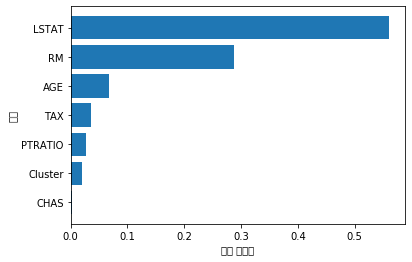

In [175]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)


df_importance.sort_values("Importance", ascending =True , inplace= True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
